In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Conv2DTranspose, LeakyReLU, Flatten, Reshape

c:\Users\allan\miniconda3\envs\tf2.9\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset = tf.keras.datasets.mnist.load_data()

In [3]:
(x_train, y_train), (x_test, y_test) = dataset

In [4]:
def display_image(image_tensor):
    plt.imshow(image_tensor)
    plt.show()
    pass

def rescale_dataset(image, label):
    return image/255, label/255.

In [5]:
x_train = tf.constant(x_train, dtype = tf.float32)

In [6]:
x_train = tf.expand_dims(x_train, axis = -1)
x_train = tf.data.Dataset.from_tensor_slices((x_train, x_train))
x_train = x_train.map(rescale_dataset)

In [7]:
x_train = x_train.batch(batch_size=32)

In [8]:
#Build the auto encoder
encoder_model = tf.keras.models.Sequential([
    #Encoder
    Input(shape = (28, 28, 1)),
    Conv2D(filters = 4, kernel_size = (3,3), strides = (2,2), activation = LeakyReLU(), padding = 'same'),
    Conv2D(filters = 8, kernel_size = (3,3), strides = (2,2), activation = LeakyReLU(), padding = 'same'),
    Flatten(),
    Dense(units = 100, activation = LeakyReLU()),
    #Encoder layer
    Dense(units = 3, activation = LeakyReLU())
])


In [9]:
decoder_model = tf.keras.models.Sequential([
    Input(shape = [3]),
    Dense(units = 7*7*8, activation = LeakyReLU()),
    Reshape(target_shape = (7, 7, 8)),
    Conv2DTranspose(filters = 8, kernel_size = (3,3), strides = (2,2), padding = 'same', activation = LeakyReLU()),
    Conv2DTranspose(filters = 4, kernel_size = (3,3), strides = (2,2), padding = 'same', activation = LeakyReLU()),
    Conv2DTranspose(filters = 1, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'sigmoid')
])

In [10]:
auto_encoder = tf.keras.models.Sequential([encoder_model, decoder_model])

In [11]:
auto_encoder.compile(loss = tf.keras.losses.MeanSquaredError(), optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), metrics = ['accuracy'])

In [12]:
auto_encoder.fit(x_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 17s 8ms/step - loss: 0.0883 - accuracy: 0.7971
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0614 - accuracy: 0.7968
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0553 - accuracy: 0.7959
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0532 - accuracy: 0.7975
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0515 - accuracy: 0.7982


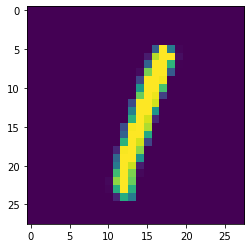

In [13]:
#Example of the image which was encoded as a 3d vector:
image = x_test[5]
display_image(image)

In [14]:
x_test = tf.cast(x_test, tf.float32)
x_test = x_test/255

In [15]:
index = 0
def get_vector_and_label(image_index):
    image_tensor = x_test[image_index]
    image_label = y_test[image_index]
    input_to_network = tf.expand_dims(image_tensor, axis = 0)
    encoded_vector = encoder_model(input_to_network)
    return encoded_vector, image_tensor, image_label

In [16]:
def get_list_vectors(class_label, limit):
    vector_list = []

    for index in range(x_test.shape[0]):
        if len(vector_list) >= limit:
            break
        encoded_vector, image_tensor, image_label = get_vector_and_label(index)
        if image_label == class_label:
            vector_list.append(encoded_vector)
        else:
            continue
        pass
    return vector_list

In [17]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

def plot_list_of_vectors(encoded_vector_list1, encoded_vector_list2):
    fig = plt.figure(figsize=(5,5))
    #ax = fig.add_subplot(111, projection= '3d')
    ax = Axes3D(fig)
    for encoded_vector1, encoded_vector2 in zip(encoded_vector_list1, encoded_vector_list2):
        ax.scatter(encoded_vector1[0][0], encoded_vector1[0][1], encoded_vector1[0][2], c='blue')
        ax.scatter(encoded_vector2[0][0], encoded_vector2[0][1], encoded_vector2[0][2], c='red')
        pass
    plt.show()


C:\Users\allan\AppData\Local\Temp\ipykernel_15348\1004892724.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


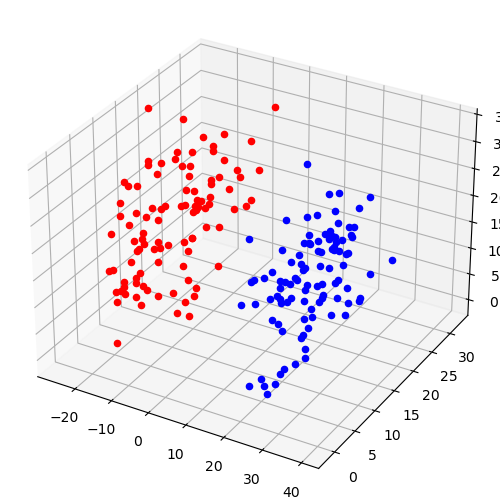

In [18]:
vector_list1 = get_list_vectors(class_label = 1, limit = 100)
vector_list2 = get_list_vectors(class_label = 0, limit = 100)
plot_list_of_vectors(vector_list1, vector_list2)